### Importación de datos



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda["Tienda"] = "Tienda"
tienda2["Tienda"] = "Tienda 2"
tienda3["Tienda"] = "Tienda 3"
tienda4["Tienda"] = "Tienda 4"

df = pd.concat([tienda, tienda2, tienda3, tienda4])

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,Tienda
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175,Tienda
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359,Tienda
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444,Tienda
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250,Tienda
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359,Tienda


#1. Análisis de facturación



In [2]:
import matplotlib.pyplot as plt

lista = [(row["Precio"], row["Categoría del Producto"], row["Calificación"], row["Producto"], "Tienda 1") for _, row in tienda.iterrows()]
lista2 = [(row["Precio"], row["Categoría del Producto"], row["Calificación"], row["Producto"],"Tienda 2") for _, row in tienda2.iterrows()]
lista3 = [(row["Precio"], row["Categoría del Producto"], row["Calificación"], row["Producto"],"Tienda 3") for _, row in tienda3.iterrows()]
lista4 = [(row["Precio"], row["Categoría del Producto"], row["Calificación"], row["Producto"],"Tienda 4") for _, row in tienda4.iterrows()]

facturacion = {}
ventas = lista + lista2 + lista3 + lista4

for precio, categoria, calificacion, producto, tienda in ventas:
  try:
    precio_float = float(precio)
    facturacion[tienda] = facturacion.get(tienda, 0) + precio_float
  except:
    continue

print("Facturacion por tienda")
for tienda_nombre, total in sorted(facturacion.items(), key=lambda x: x[1], reverse=True):
  print(f"{tienda_nombre}: ${total:,.2f}")

Facturacion por tienda
Tienda 1: $1,150,880,400.00
Tienda 2: $1,116,343,500.00
Tienda 3: $1,098,019,600.00
Tienda 4: $1,038,375,700.00


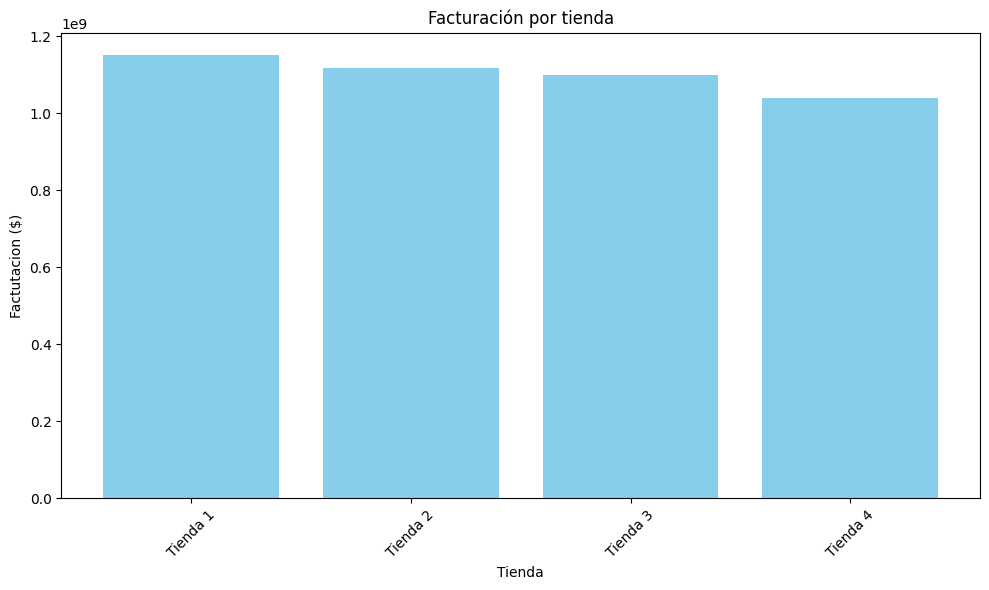

In [3]:
facturacion_ordenada = dict(sorted(facturacion.items(), key=lambda x: x[1], reverse=True))


tiendas = list(facturacion_ordenada.keys())
montos = list(facturacion_ordenada.values())

plt.figure(figsize=(10,6))
plt.bar(tiendas, montos, color="skyblue")
plt.title("Facturación por tienda")
plt.xlabel("Tienda")
plt.ylabel("Factutacion ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Ventas por categoría

In [4]:
venta_por_categoria = {}

for precio, categoria, calificacion, producto, tienda in ventas:
    if tienda not in venta_por_categoria:
      venta_por_categoria[tienda] = {}
    if categoria not in venta_por_categoria[tienda]:
      venta_por_categoria[tienda][categoria] = 0
    try:
      venta_por_categoria[tienda][categoria] += float(precio)
    except:
      continue

for tienda, categorias in venta_por_categoria.items():
  print(f"\n{tienda} - ventas por categoria: ")
  for categoria, total in sorted(categorias.items(), key=lambda x: x[1], reverse=True):
    print(f"{categoria}: ${total:,.2f}")


Tienda 1 - ventas por categoria: 
Electrónicos: $429,493,500.00
Electrodomésticos: $363,685,200.00
Muebles: $187,633,700.00
Instrumentos musicales: $91,299,000.00
Deportes y diversión: $39,290,000.00
Juguetes: $17,995,700.00
Artículos para el hogar: $12,698,400.00
Libros: $8,784,900.00

Tienda 2 - ventas por categoria: 
Electrónicos: $410,831,100.00
Electrodomésticos: $348,567,800.00
Muebles: $176,426,300.00
Instrumentos musicales: $104,990,300.00
Deportes y diversión: $34,744,500.00
Juguetes: $15,945,400.00
Artículos para el hogar: $14,746,900.00
Libros: $10,091,200.00

Tienda 3 - ventas por categoria: 
Electrónicos: $410,775,800.00
Electrodomésticos: $329,237,900.00
Muebles: $201,072,100.00
Instrumentos musicales: $77,380,900.00
Deportes y diversión: $35,593,100.00
Juguetes: $19,401,100.00
Artículos para el hogar: $15,060,000.00
Libros: $9,498,700.00

Tienda 4 - ventas por categoria: 
Electrónicos: $409,476,100.00
Electrodomésticos: $283,260,200.00
Muebles: $192,528,900.00
Instrumen

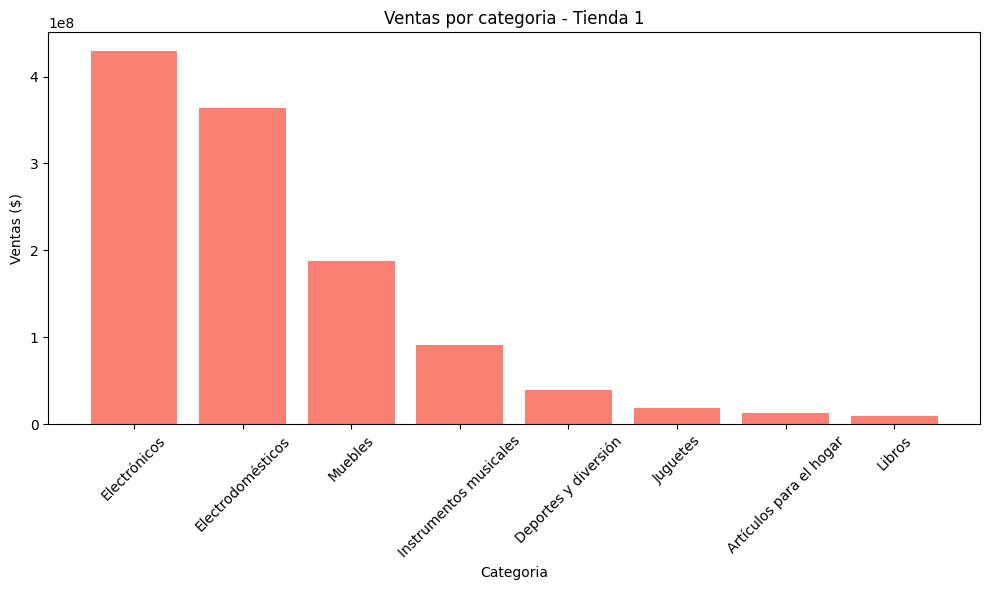

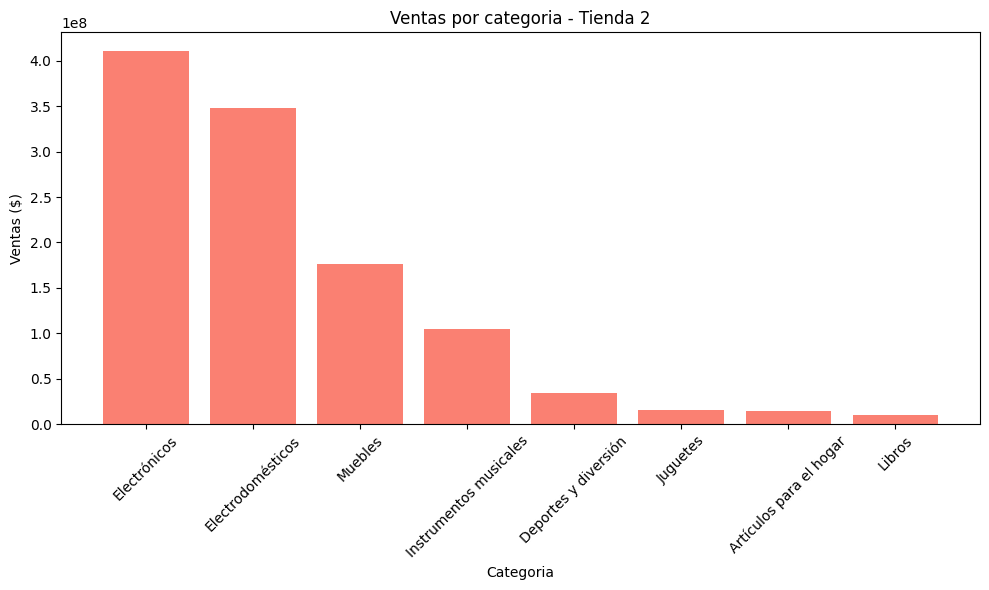

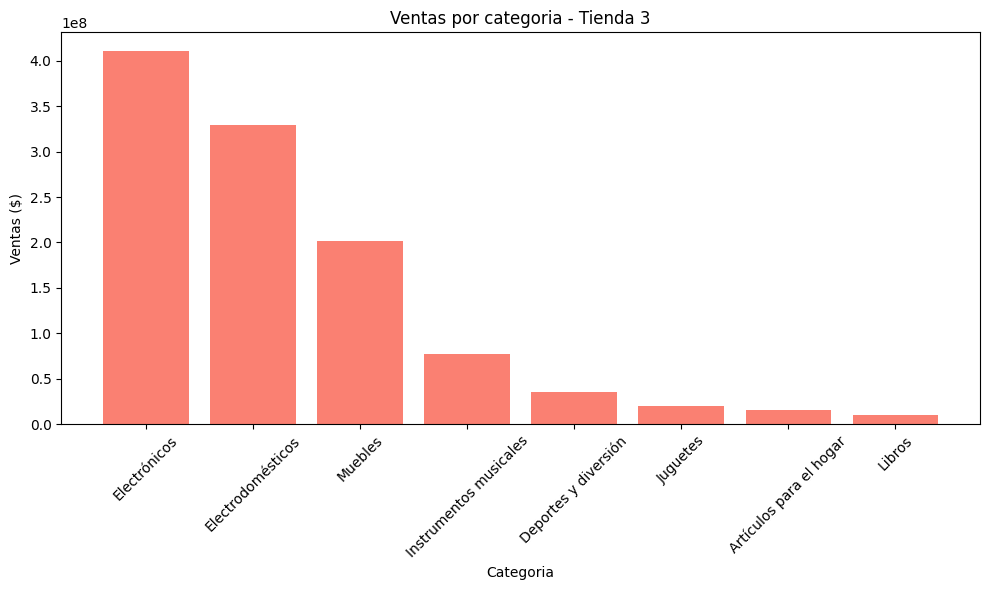

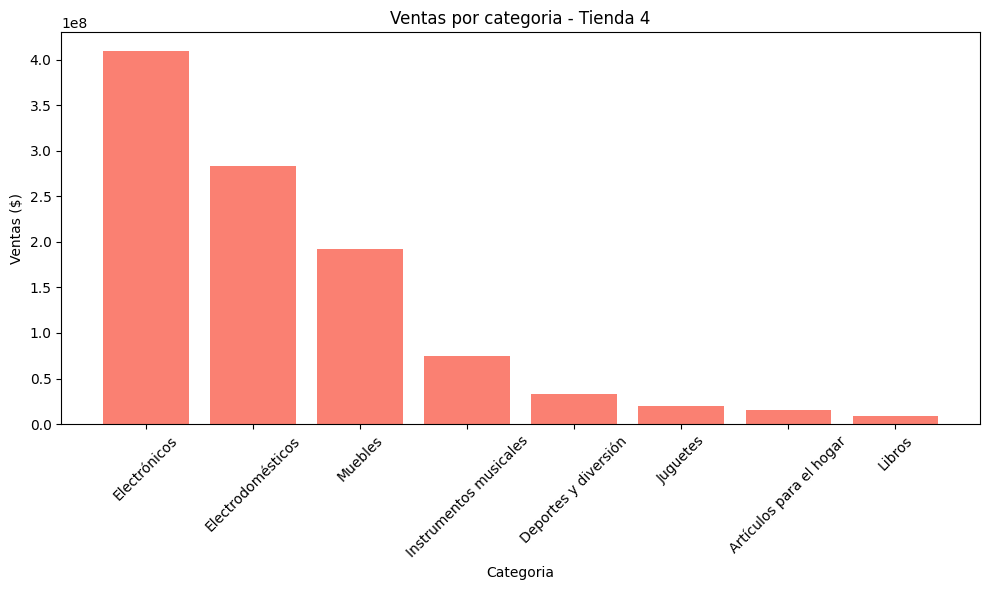

In [5]:
for tienda, categorias in venta_por_categoria.items():
    categorias_ordenadas = dict(sorted(categorias.items(), key=lambda x: x[1], reverse=True))

    nombres = list(categorias_ordenadas.keys())
    valores = list(categorias_ordenadas.values())

    plt.figure(figsize=(10,6))
    plt.bar(nombres, valores, color=("salmon"))
    plt.title(f"Ventas por categoria - {tienda}")
    plt.xlabel("Categoria")
    plt.ylabel("Ventas ($)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# 3. Calificación promedio de la tienda


In [6]:
calificaciones = {}
conteo_calificacion = {}

for precio, categoria, calificacion, producto, tienda in ventas:
  try:
    calificaciones[tienda] = calificaciones.get(tienda, 0) + float(calificacion)
    conteo_calificacion[tienda] = conteo_calificacion.get(tienda, 0) +1
  except:
    continue

media_calificaciones = {tienda: calificaciones[tienda] / conteo_calificacion[tienda]
                        for tienda in calificaciones}

print("\nMedia de calificaciones por tienda: ")
for tienda, media in sorted(media_calificaciones.items(), key=lambda x: x[1], reverse=True):
  print(f"{tienda}: {media:.2f}")


Media de calificaciones por tienda: 
Tienda 3: 4.05
Tienda 2: 4.04
Tienda 4: 4.00
Tienda 1: 3.98


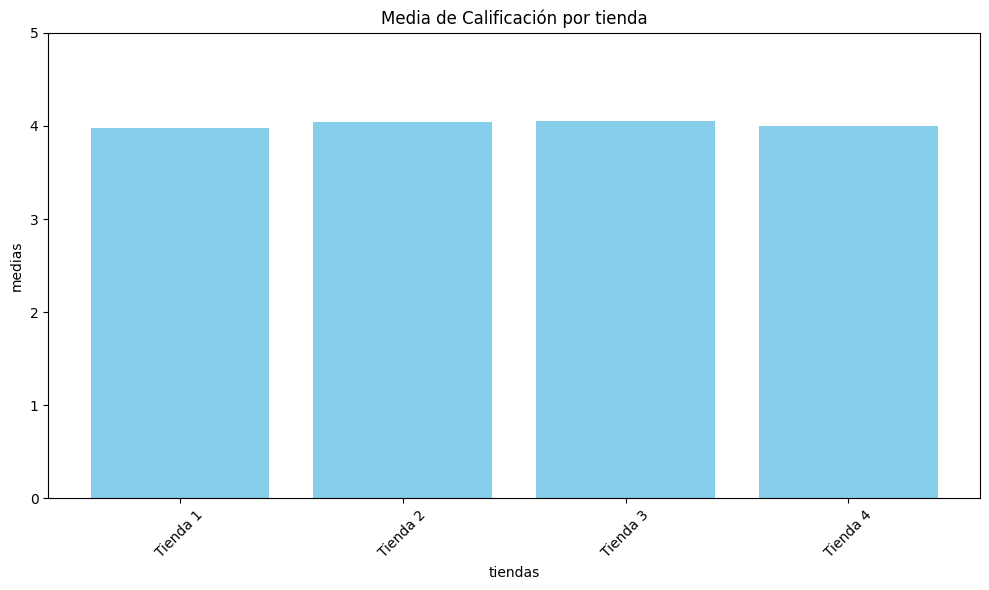

In [7]:
tiendas = list(media_calificaciones.keys())
medias = list(media_calificaciones.values())

plt.figure(figsize=(10,6))
plt.bar(tiendas, medias, color=("skyblue"))
plt.title("Media de Calificación por tienda")
plt.xlabel("tiendas")
plt.ylabel("medias")
plt.ylim(0, 5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. Productos más y menos vendidos

In [9]:
from collections import defaultdict, Counter

ventas_por_tienda = defaultdict(list)

for precio, categoria, calificacion, producto, tienda in ventas:
  ventas_por_tienda[tienda].append(producto)

for tienda, productos in ventas_por_tienda.items():
  conteo = Counter(productos)
  mas_vendidos = conteo.most_common(3)
  menos_vendidos = conteo.most_common()[-3:]

  print(f"\nTienda {tienda}")
  print("Mas vendidos:")
  for producto, cantidad in mas_vendidos:
    print(f"{producto}: {cantidad} ventas")

  print("Menos Vendidos")
  for producto, cantidad in menos_vendidos:
    print(f"{producto}: {cantidad} ventas")


Tienda Tienda 1
Mas vendidos:
Microondas: 60 ventas
TV LED UHD 4K: 60 ventas
Armario: 60 ventas
Menos Vendidos
Olla de presión: 35 ventas
Auriculares con micrófono: 33 ventas
Celular ABXY: 33 ventas

Tienda Tienda 2
Mas vendidos:
Iniciando en programación: 65 ventas
Microondas: 62 ventas
Batería: 61 ventas
Menos Vendidos
Mesa de comedor: 34 ventas
Impresora: 34 ventas
Juego de mesa: 32 ventas

Tienda Tienda 3
Mas vendidos:
Kit de bancas: 57 ventas
Mesa de comedor: 56 ventas
Cama king: 56 ventas
Menos Vendidos
Mochila: 36 ventas
Microondas: 36 ventas
Bloques de construcción: 35 ventas

Tienda Tienda 4
Mas vendidos:
Cama box: 62 ventas
Cubertería: 59 ventas
Dashboards con Power BI: 56 ventas
Menos Vendidos
Guitarra acústica: 37 ventas
Armario: 34 ventas
Guitarra eléctrica: 33 ventas


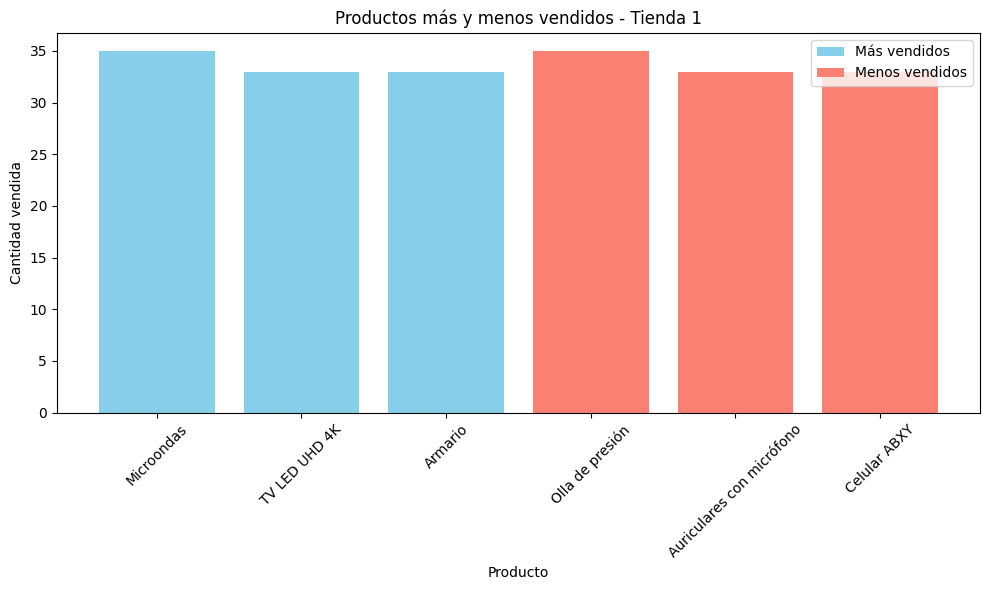

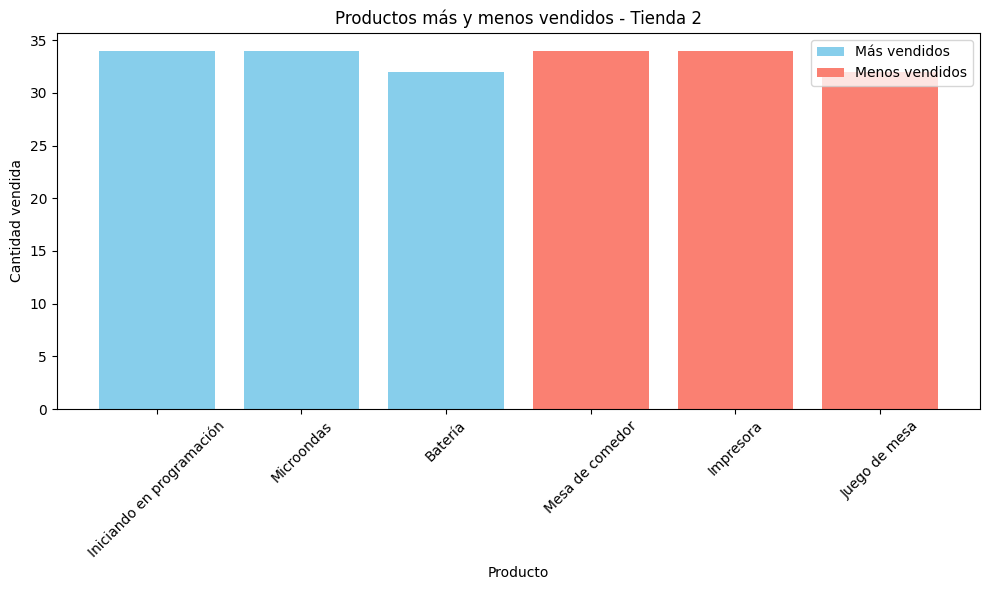

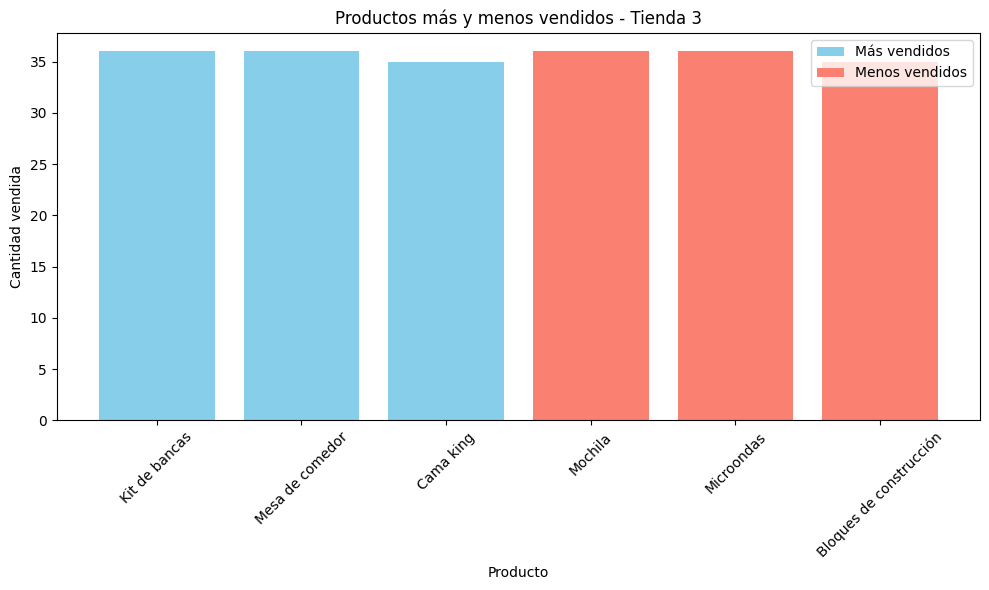

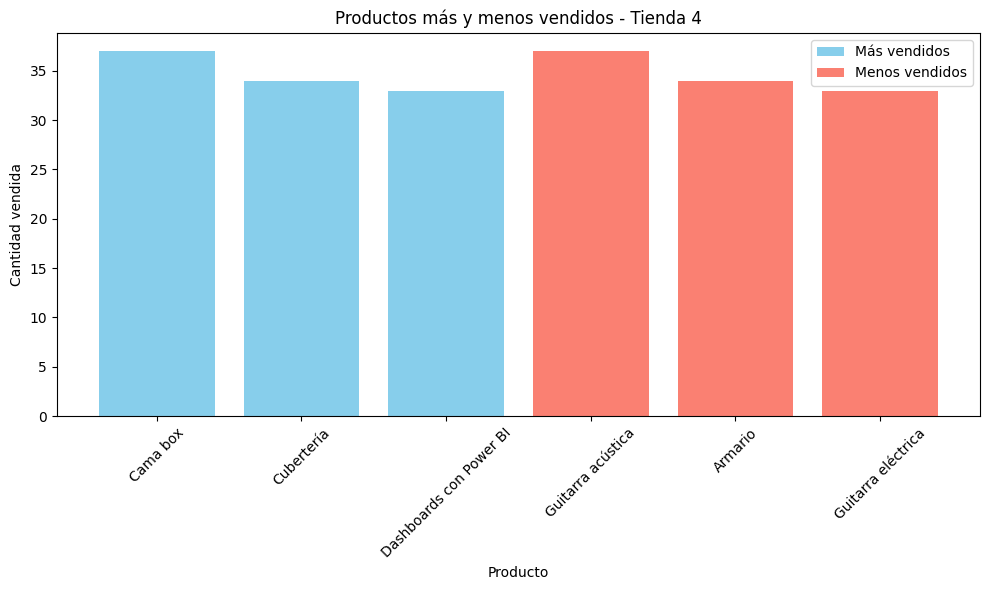

In [10]:
for tienda, productos in ventas_por_tienda.items():
  conteo = Counter(productos)

  mas_vendidos = conteo.most_common(3)
  nombres_mas = [prod for prod, _ in mas_vendidos]
  cantidades_mas = [cant for _,  cant in mas_vendidos]

  menos_vendidos = conteo.most_common()[-3:]
  nombres_menos = [prod for prod, _ in menos_vendidos]
  cantidades_menos = cantidades_mas = [cant for _,  cant in menos_vendidos]

  plt.figure(figsize=(10,6))
  plt.bar(nombres_mas, cantidades_mas, color="skyblue", label="Más vendidos")
  plt.bar(nombres_menos, cantidades_menos, color="salmon", label="Menos vendidos")
  plt.title(f"Productos más y menos vendidos - {tienda}")
  plt.xlabel("Producto")
  plt.ylabel("Cantidad vendida")
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.legend()
  plt.show()

# 5. Envío promedio por tienda

In [11]:
promedios = df.groupby("Tienda")["Costo de envío"].mean()

print("Promedio de envío por tienda:")
for tienda, promedio in promedios.items():
  print(f"{tienda}: ${promedio:.2f}")

Promedio de costo de envío por tienda:
Tienda: $26018.61
Tienda 2: $25216.24
Tienda 3: $24805.68
Tienda 4: $23459.46


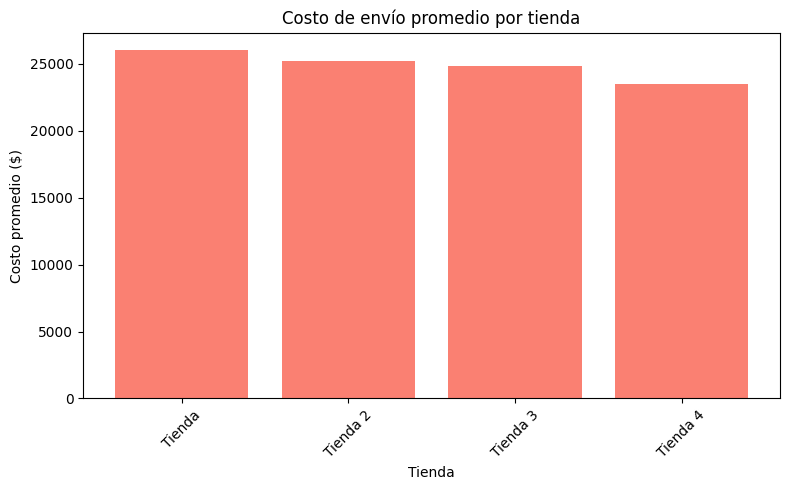

In [12]:
tiendas = promedios.index
costos_promedio = promedios.values

plt.figure(figsize=(8,5))
plt.bar(tiendas, costos_promedio, color="salmon")
plt.title("envío promedio por tienda")
plt.xlabel("Tienda")
plt.ylabel("Costo promedio ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##Informe de desenpeño de tiendas

#1- Objetivo del analisis
Determinar mediante el analisis de los datos que tienda tiene un menor rendimiento y en base a ello concluir que tiende debe de ser cerrada

#2- Analisis de facturación
Basado en el analisis de facturación la tienda que más ha facturado es la Tienda numero 1, mientras que la que menos ha facturado ha sido la Tienda numero 4

#3- Ventas por categoria
En cada tienda se ha mantenido una tendencia los electrodomesticos son los que más se venden, mientras que los libros son la categoría con menos ventas.

#4- Calificación por tienda
La tienda con mejor calificación es la número 3 mientras que la que tiene una peor media de calificación es la numero 1

#5- Productos más y menos vendidos
Estos son los productos mas vendidos por tienda:
1.   Tienda 1: Microondas
2.   Tienda 2: Iniciando en programación
3.   Tienda 3: Kit de bancas
4.   Tienda 4: Cama box

Estos son los productos menos vendidos por tienda:

1.   Tienda 1: olla de presión
2.   Tienda 2: Mesa de comedor
3.   Tienda 3: Mochila
4.   Tienda 4: Guitarra acústica

#6- Envio promedio por tienda
Las gráficas muestran que la Tienda 1 tiene clara ventaja en el numéro de envios siendo la que más envios efectua, mientras que la peor rendimiento presento en este apartado fue la tienda 4.



#Conclusion

Basado en los datos anteriormente expuestos la tienda que ha presentado un menor desempeño es la Tienda numero 4 siendo la Tienda número 1 la que prensento un mejor desenpeño, y aunque la tienda 4 presento una calificicación ligeramente superior a la de la Tienda 1 sigue siendo la que ha presentado una mayor facturación como resultado el promedio de los envios es mayor que la tienda numero 4 por tanto recomiendo el cierre de la Tienda número 4.